# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


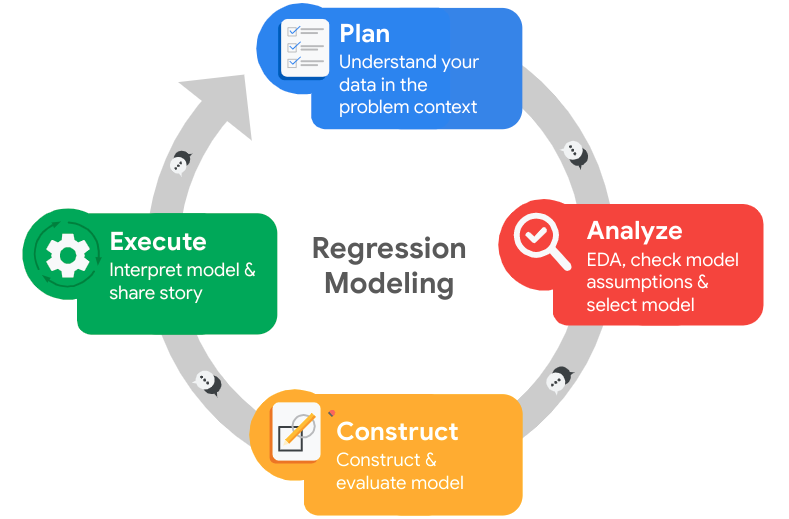

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




The HR team, the employees, and the company.

This project aims to build a model that will help HR identify the employees that might leave and take measures in response to keep them.

By inspecting the columns and their descriptions, they all seem relevant predictor variables, and the target variable is 'left'

The PACE document and the experience with past course projects.

At this stage there doesn't seem to be any ethical implications.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [109]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [35]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe(include = 'all')

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary_range
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [15]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns = {'average_montly_hours': 'average_monthly_hours', 'Work_accident': 'work_accident', 
                            'Department': 'department', 'salary': 'salary_range', 'time_spend_company': 'tenure'})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary_range'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [16]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary_range             0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [17]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [18]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary_range
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [19]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df0_subset = df0.drop_duplicates().reset_index(drop = True)

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df0_subset.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary_range
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [20]:
df0_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary_range           11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 936.9+ KB


### Check outliers

Check for outliers in the data.

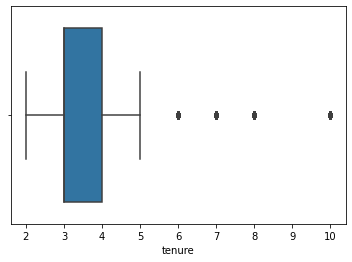

In [21]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

sns.boxplot(df0_subset['tenure'])

In [30]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
q1 = df0_subset['tenure'].quantile(0.25)
q3 = df0_subset['tenure'].quantile(0.75)

iqr = q3 - q1

upper_limit = q3 + (iqr * 1.5)


In [31]:
upper_limit

5.5

In [36]:
df0_subset['tenure'].value_counts()

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: tenure, dtype: int64

In [37]:
outliers = df0_subset[df0_subset['tenure'] >= upper_limit]

In [38]:
outliers

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary_range
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11985,0.22,0.94,3,193,10,0,0,1,management,high
11986,0.90,0.55,3,259,10,1,0,1,management,high
11987,0.74,0.95,5,266,10,0,0,1,management,high
11988,0.85,0.54,3,185,10,0,0,1,management,high


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




Less average hours per month, longer tenure, seemed correlated with employees not leaving.
People with longer tenure seem to work less hours on average, and handle less projects.

The data is not normally distributed, it is mainly even or skewed.

I transformed the categorical variables into numerical variables by mapping and dummy variables

To understand the distribution of the data, understand the context of the data, get the statistics and insights that might be relevant for the cleaning of the data and model trining, to clean the data.

I used visualization tools and preprocessing tools like seaborn and one-hot-encoding

At this point I have not ethical problems with the project precesses.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [40]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df0_subset['left'].value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df0_subset['left'].value_counts(normalize = True).mul(100))

0    10000
1     1991
Name: left, dtype: int64
0    83.39588
1    16.60412
Name: left, dtype: float64


In [41]:
df0_subset.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary_range'],
      dtype='object')

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

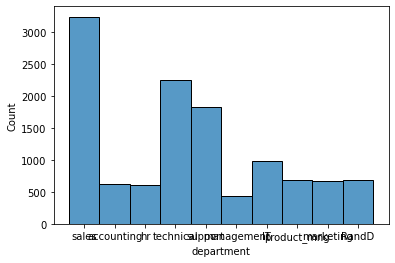

In [56]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(df0_subset['department'])

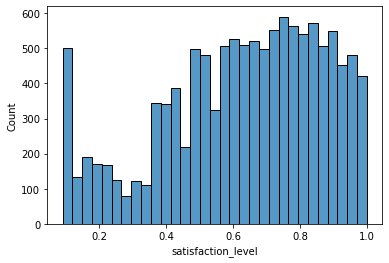

In [49]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(df0_subset['satisfaction_level'])

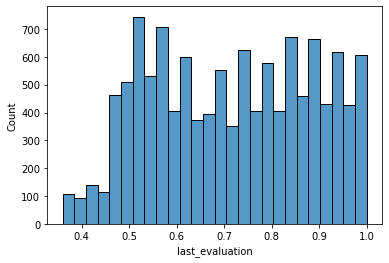

In [51]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(df0_subset['last_evaluation'])

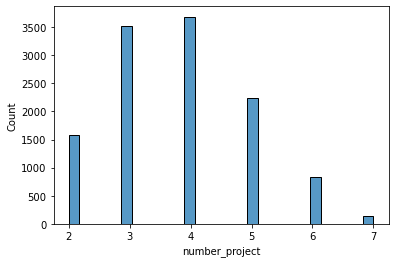

In [52]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(df0_subset['number_project'])

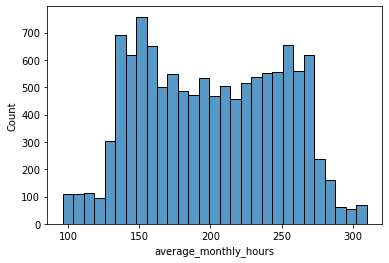

In [53]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(df0_subset['average_monthly_hours'])

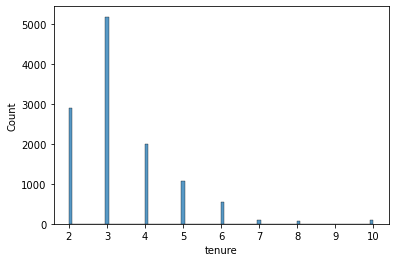

In [54]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(df0_subset['tenure'])

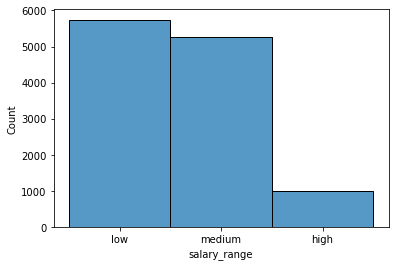

In [55]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(df0_subset['salary_range'])

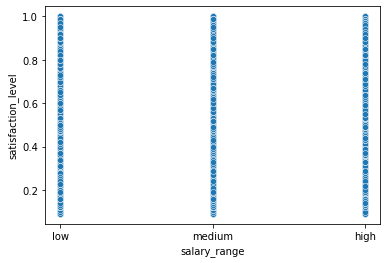

In [58]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.scatterplot(x = df0_subset['salary_range'], y = df0_subset['satisfaction_level'])

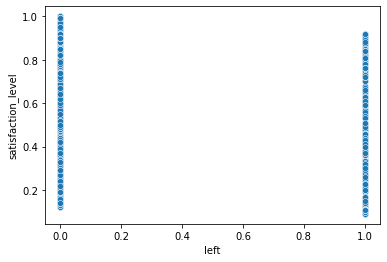

In [59]:
sns.scatterplot(x = df0_subset['left'], y = df0_subset['satisfaction_level'])

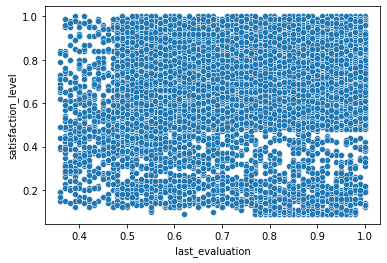

In [61]:
sns.scatterplot(x = df0_subset['last_evaluation'], y = df0_subset['satisfaction_level'])

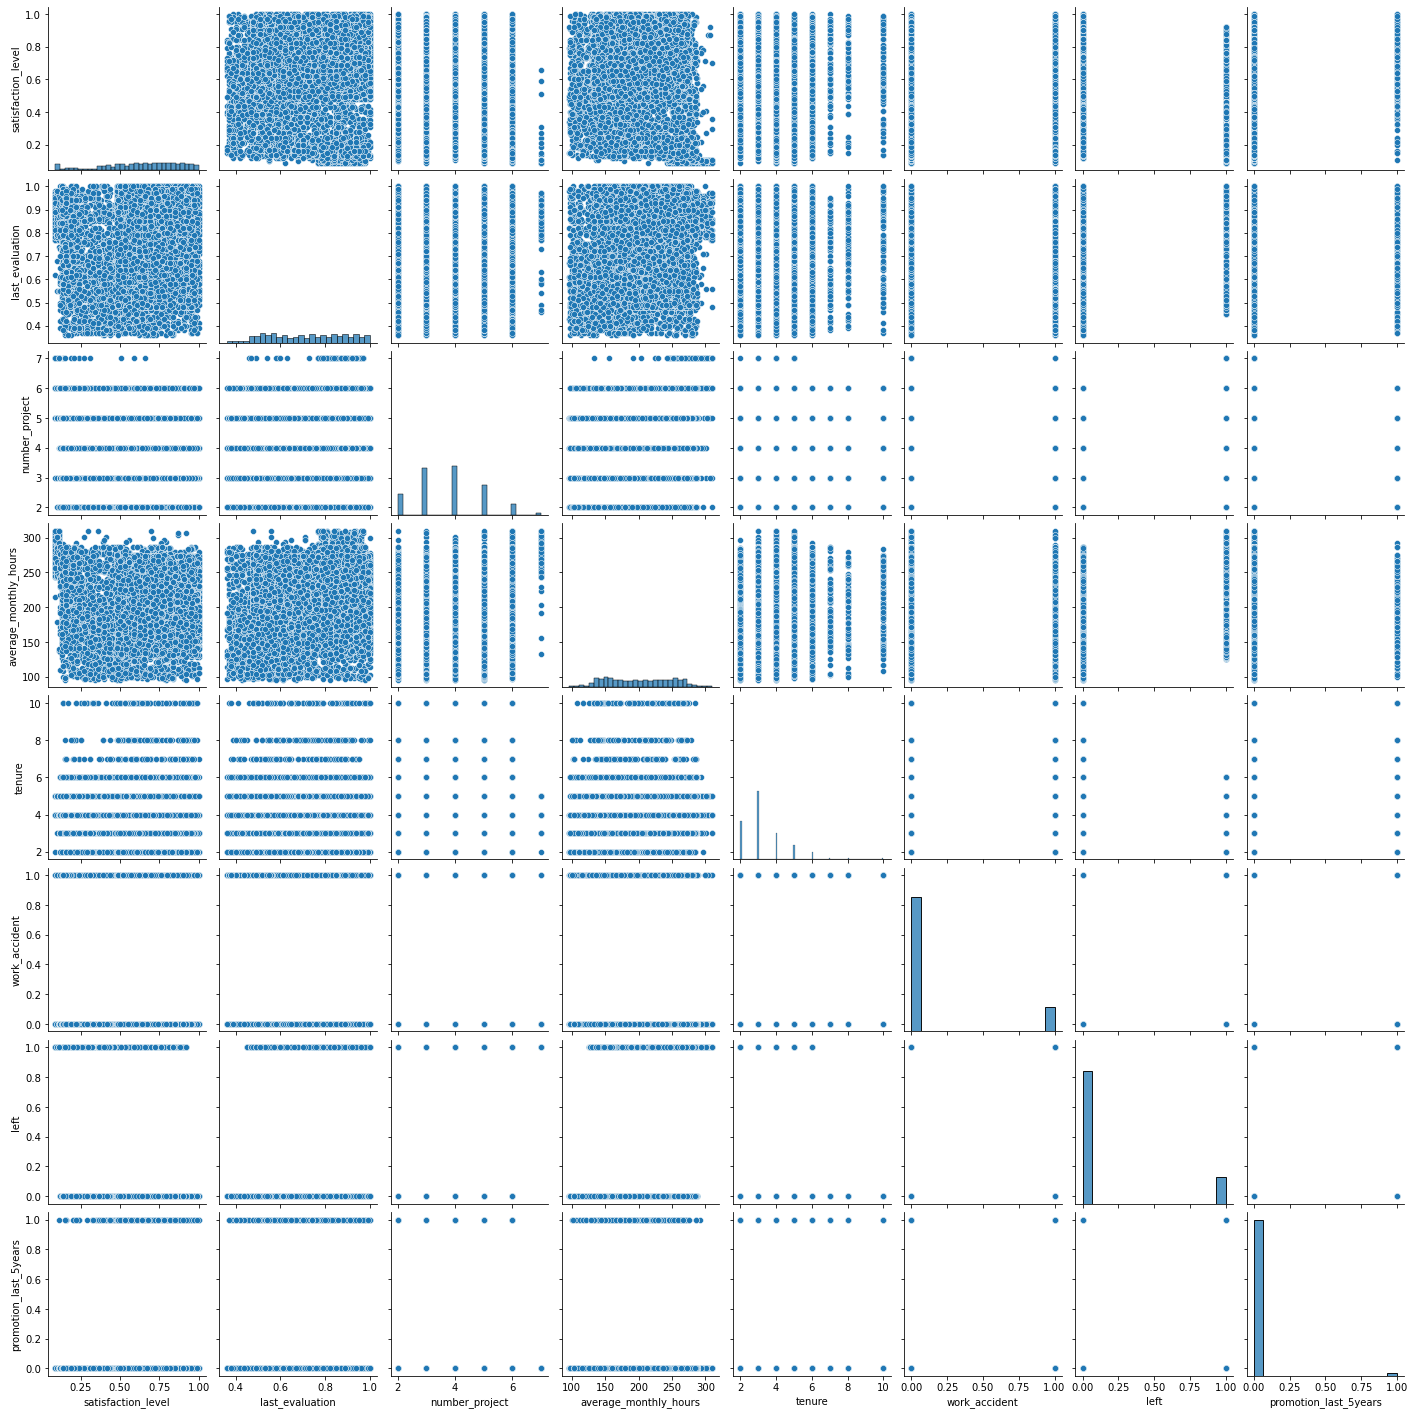

In [62]:
sns.pairplot(df0_subset)

### Insights

Less average hours per month, longer tenure, seemed correlated with employees not leaving.

People with longer tenure seem to work less hours on average, and handle less projects.

Sales, Support, and Technical departments loose a lot of employees, more that the other departments.

In [63]:
from sklearn.preprocessing import OrdinalEncoder

In [77]:
encoder = OrdinalEncoder()
df0_encoded = df0_subset.copy()
df0_encoded['department'] = encoder.fit_transform(df0_subset[['department']])
df0_final = pd.get_dummies(df0_encoded, drop_first = True)

In [69]:
df0_encoded['department'].value_counts()

7.0    3239
9.0    2244
8.0    1821
0.0     976
1.0     694
6.0     686
5.0     673
2.0     621
3.0     601
4.0     436
Name: department, dtype: int64

In [75]:
df0_subset.groupby(['department', 'left'])[['left']].sum()

left
department  left      
IT          0        0
            1      158
RandD       0        0
            1       85
accounting  0        0
            1      109
hr          0        0
            1      113
management  0        0
            1       52
marketing   0        0
            1      112
product_mng 0        0
            1      110
sales       0        0
            1      550
support     0        0
            1      312
technical   0        0
            1      390

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Almost half of the data is binary, and some departments loose more employees than others.

I chose to keep all independent variables apart from the target because they are relevant to an employee work life.

Since random forest and xgboost are robust models they can handle the dataset.

The model is able to fit the data well.

I would try different parameters now that we have an idea of the balance selected by the gridsearch.

I found usefull the metrics, the models from sklearn and xgboost.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

We are trying to predict wheather an employee will leave, so it is a classification task.

### Identify the types of models most appropriate for this task.

The dataset contains different scales of data, so a robust model like RandomForestClassifier or XGBClassifier are more likely to perform better.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [81]:
### YOUR CODE HERE ###
X = df0_final.copy()
y = X['left']
X = X.drop(columns = 'left')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, stratify = y_train, random_state = 0)

**RandomForestClassifier**

In [86]:
rf = RandomForestClassifier(random_state = 0)

rf_params = {'max_depth': [2,3,5,None],
            'n_estimators': [100,150,250],
            'min_samples_leaf': [1,2,4],
            'min_samples_split': [2,3,4],
            'max_features': [6,7]}

scoring = ['accuracy','precision','recall','f1']

rf_cv = GridSearchCV(rf, rf_params, scoring = scoring, cv = 5, refit = 'recall', n_jobs = -1, verbose = 1)

In [87]:
%%time
# Fit the RandomForestClassifier cv_model
rf_cv.fit(X_tr, y_tr)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  9.7min finished


CPU times: user 6.56 s, sys: 712 ms, total: 7.27 s
Wall time: 9min 41s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [88]:
# Model best estimator hyperparameters
rf_cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [89]:
# Recall Score
rf_cv.best_score_

0.9238493723849371

In [92]:
# Precision score
rf_results = pd.DataFrame(rf_cv.cv_results_)
rf_results['mean_test_precision'][rf_cv.best_index_]

0.9866517308981291

In [95]:
#rf_pred
rf_pred = rf_cv.best_estimator_.predict(X_val)

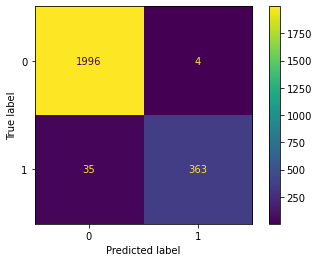

In [96]:
# RF Confussion Matrix
rf_cm = confusion_matrix(y_val, rf_pred, labels = rf_cv.best_estimator_.classes_)

#Display
rf_display = ConfusionMatrixDisplay(confusion_matrix = rf_cm, display_labels = rf_cv.best_estimator_.classes_)

# Plot Matrix
rf_display.plot(values_format = 'd')

# Display matrix
plt.show()

**XGBoost**

In [98]:
# GridSearchCV
xgb = XGBClassifier(objective = 'binary:logistic', random_state = 0)

xgb_params = {'max_depth': [2,3,4],
             'n_estimators': [100,150,250,300],
             'learning_rate': [0.01,0.1],
             'min_child_weight': [2,4,6],
             'subsample': [0.7],
             'colsample_bytree': [0.7]}

scoring = ['accuracy','precision','recall','f1']

xgb_cv = GridSearchCV(xgb, xgb_params, scoring = scoring, cv = 5, refit = 'recall', n_jobs = -1, verbose = 1)

In [99]:
%%time
# Fit the XGBClassifier with cross-validation
xgb_cv.fit(X_tr, y_tr)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  3.5min finished


CPU times: user 4min 47s, sys: 543 ms, total: 4min 47s
Wall time: 5min 50s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.01, 0.1], 'max_d

In [100]:
# xgb_cv best estimator hyperparameters
xgb_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [101]:
# Recall Score
xgb_cv.best_score_

0.9188284518828451

In [102]:
# Precision Score
xgb_results = pd.DataFrame(xgb_cv.cv_results_)
xgb_results['mean_test_precision'][xgb_cv.best_index_]

0.9566057863598232

In [103]:
xgb_pred = xgb_cv.best_estimator_.predict(X_val)

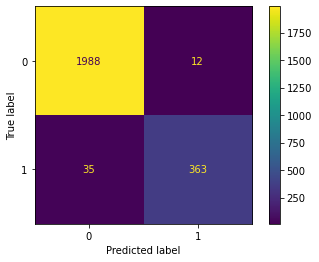

In [106]:
# Confusion matrix
xgb_cm = confusion_matrix(y_val, xgb_pred, labels = xgb_cv.best_estimator_.classes_)

# Matrix Display
xgb_display = ConfusionMatrixDisplay(confusion_matrix = xgb_cm, display_labels = xgb_cv.best_estimator_.classes_)

# plot matrix
xgb_display.plot(values_format = 'd')

# Display matrix
plt.show()

## Model Conclusion

Both the RandomForestClassifier and the XGBClassifier performed really well on the validation data, both achieving above a 90% of recall and precision.

The model that performed the best is RandomForestClassifier with a recall of 92.38% and a precision of 98.66%.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



## RandomForestClassifier on the test data

In [108]:
# rf_cv preediction on test data
rf_final_pred = rf_cv.best_estimator_.predict(X_test)

In [112]:
# Classification Report and evaluation metrics
rf_report = classification_report(y_test, rf_final_pred, output_dict = True, zero_division = 0)
rf_results = pd.DataFrame(rf_report).T
rf_results

,precision,recall,f1-score,support
0,0.983752,0.998501,0.991071,2001.000000
1,0.991848,0.917085,0.953003,398.000000
accuracy,0.984994,0.984994,0.984994,0.984994
macro avg,0.987800,0.957793,0.972037,2399.000000
weighted avg,0.985095,0.984994,0.984756,2399.000000


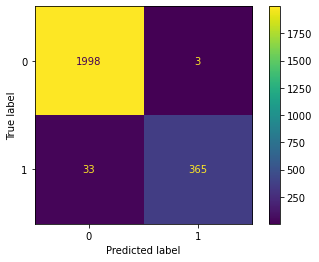

In [113]:
# Confusion matrix
rf_final_cm = confusion_matrix(y_test, rf_final_pred, labels = rf_cv.best_estimator_.classes_)

# Matrix display
rf_final_display = ConfusionMatrixDisplay(confusion_matrix = rf_final_cm, display_labels = rf_cv.best_estimator_.classes_)

# Matrix plot
rf_final_display.plot(values_format = 'd')

# Display matrix
plt.show()

The model performed better on the test data than in the validation data.

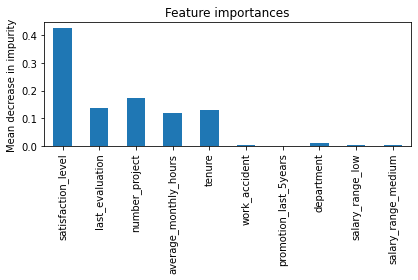

In [115]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index = X_test.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



The model revealed that there are 5 important features for predicting if an employee will leave : satisfaction_level, last_evaluation, number_project, average_monthly_hours, and tenure.

I would strongly recommend forward analysis on the satisfaction level, average monthly hours, and number of projects variables since these are the most correlated to the target variable. I would recommend to analyse these variables and then implement measures tu improve in them.

My recommendation to the manager is to make a priority the employee work-life balance since they work long hours and earn a low-medium range salary.

The model can be improved if training only in the 5 mentioned variables and trained in more extent.

Confusion Matrices where really useful to understand the evaluations and performance of the model.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Precision = 0.991848, Recall = 0.917085, F1 = 0.953003, Accuracy = 0.984994

These evaluation metrics demonstrate the high performance of the model on unseen data, being able to classify them correctly with vary little errors.

### Conclusion, Recommendations, Next Steps

The model performs really well predicting which employees will most likely leave the company, allowing the company to teake measures to try to keep them.

I would strongly recommend forward analysis on the satisfaction level, average monthly hours, and number of projects variables since these are the most correlated to the target variable. I would recommend to analyse these variables and then implement measures tu improve in them.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.